In [ ]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Study MePHI/сем5/matstat/HW/data_matstat_K5.xls", sheet_name="A - aaup")

In [ ]:
n = len(df.A7)
sample = df.A7.to_numpy()

k = round(1 + math.log2(n))   #число интервалов
h = (max(sample) - min(sample)) / k   #ширина
print(k, h)

11 34.27272727272727


# Критерий хи-квадрат


[0.0027958993476234857,
 0.032618825722273995,
 0.12301957129543337,
 0.2190121155638397,
 0.26001863932898417,
 0.18546132339235788,
 0.11742777260018639,
 0.032618825722273995,
 0.017707362534948742,
 0.007455731593662628,
 0.001863932898415657]

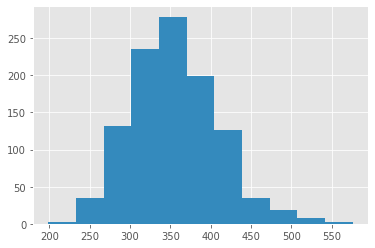

In [ ]:
frequencies = plt.hist(sample, bins=k)[0]

frequencies_relative = []
for frequence in frequencies:
  frequencies_relative.append(frequence / n)

values = plt.hist(sample, bins=k)[1]

frequencies_relative

In [ ]:
#Вероятность попадания в интервал при условии истинности основной гипотезы

mean = np.mean(sample)
std = np.std(sample)

count,division = np.histogram(sample, bins=k)

p_H_true = []
for i in range(1, len(division)):
  p = stats.norm(loc=mean, scale=std).cdf(division[i]) - stats.norm(loc=mean, scale=std).cdf(division[i-1])
  p_H_true.append(p)

p_H_true

[0.009986290973813804,
 0.04019512683994798,
 0.10928631759450905,
 0.2008165790928036,
 0.24946774164480978,
 0.20953734111919553,
 0.11898699212071995,
 0.04566654164424344,
 0.01183987292244637,
 0.0020723848098110897,
 0.0002447056549627069]

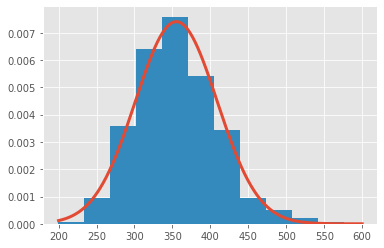

In [ ]:
#Построить гистограмму относительных частот и функцию плотности

x = np.linspace(200, 600, 10000)
norm_rv = stats.norm(loc=mean, scale=std)
pdf = norm_rv.pdf(x)

# плотность 
plt.plot(x, pdf, lw=3)

plt.hist(sample, bins=k, density=True);

#plt.ylabel('$f(z|H0)$')
#plt.xlabel('$z$');

In [ ]:
arr = []
for i in range(0,k):
  arr.append(n*p_H_true[i])
arr

[10.715290214902211,
 43.129371099264176,
 117.2642187789082,
 215.47618936657827,
 267.6788867848809,
 224.8335670208968,
 127.67304254553251,
 49.000199184273214,
 12.704183645784955]

In [ ]:
z = 0
for i in range(0,k):
  z += ((frequencies[i] - n*p_H_true[i])**2) / (n*p_H_true[i])

r = 2

f_z_chi = stats.chi2(k - r - 1).cdf(z)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

quantil = stats.chi2(k - r - 1).ppf(1-0.01)

print("chi-squared criteria for N: z = %.3f; p-value = %.3f" % (z, p_value))
print(quantil)

chi-squared criteria for N: z = 47.799; p-value = 0.000
20.090235029663233


In [ ]:
def getNP(val, freq, n1, m, sigma):
  n  = list()
  np = list()
  npx = 0
  nx = 0
  distr = stats.norm(loc = m, scale = sigma)
  for i in range(0, len(val) - 1):
    npx += (distr.cdf(val[i + 1]) - distr.cdf(val[i])) * n1
    nx += freq[i]
    if (npx >= 5):
      n.append(nx)
      np.append(npx)
      nx = 0
      npx = 0
    elif (npx < 5) and (i == len(val) - 2):
      n[len(n) - 1] = nx + n[len(n) - 1]
      np[len(np) - 1] = npx + np[len(np) - 1]    
  return (n, np)

def getZ(n, np):
    z = 0
    for i in range(0, len(n)):
        z += (n[i] - np[i])**2 / np[i]
    return z

def getNP_no_merge(val, freq, n1, m, sigma):
  n  = list()
  np = list()
  npx = 0
  nx = 0
  distr = stats.norm(loc = m, scale = sigma)
  for i in range(0, len(val) - 1):
    npx = (distr.cdf(val[i + 1]) - distr.cdf(val[i])) * n1
    nx = freq[i]
    n.append(nx)
    np.append(npx)
     
  return (n, np)

In [ ]:
alpha = 0.01

new_n, new_np = getNP(values, frequencies, n, mean, std)



z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("chi-squared criteria for N: z = %.3f; p-value = %.3f" % (z, p_value))
# у меня вышел ноль, я хз
# ошибка 2 рода для всех строк

chi-squared criteria for N: z = 30.732; p-value = 0.000


# критерий Харке-Бера

In [ ]:
stats.jarque_bera(sample)

(44.13218548064099, 2.611064697788379e-10)